In [486]:
# libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm

# necessary libraries will be imported further 

# PART 0 : Reading the Data

In [487]:
#reading csv
data=pd.read_excel(r'C:\Users\ajay\Downloads\Fytlyff_DS_Interview.xlsx',parse_dates=True)

In [488]:
#data head
data.head()

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4
0,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Bengaluru,NaN,NaN,56892,17178
1,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Hyderabad,NaN,NaN,41460,11916
2,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Dehradun,NaN,NaN,55561,19461
3,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Indore,NaN,NaN,320923,110667
4,2020,Jan,Desktop_Website,Existing_Customer,Came_From_LinkedIn,Pune,NaN,NaN,220937,46033


In [489]:
#●	Print all the column names and the data types in each column. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Year                2160 non-null   int64  
 1   Month               2160 non-null   object 
 2   Laptop/Desktop      2160 non-null   object 
 3   Type_of_Customers?  2160 non-null   object 
 4   Coming from         2160 non-null   object 
 5   Place_in_India      2160 non-null   object 
 6   Level 1             1081 non-null   float64
 7   Level 2             1081 non-null   float64
 8   Level 3             2160 non-null   int64  
 9   Level 4             2160 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 168.9+ KB


In [490]:
# ●	Print the cities of India from which the page was accessed.
data['Place_in_India'].unique()

array(['Bengaluru', 'Hyderabad', 'Dehradun', 'Indore', 'Pune'],
      dtype=object)

In [491]:
# ●	Which columns are having some values missing in them?
data.isna().sum()

Year                     0
Month                    0
Laptop/Desktop           0
Type_of_Customers?       0
Coming from              0
Place_in_India           0
Level 1               1079
Level 2               1079
Level 3                  0
Level 4                  0
dtype: int64

Level 1 and Level 2 have missing values.

    ●	Write a brief paragraph about what you think about this dataset along the lines of :
    
        ▪	What type of company this dataset belongs to? 
        Ans: By looking the dataset,it looks like job portal of a
            company.
            
            
        ▪	Suppose that this dataset is for a website l                      ike Flipkart, what could be the possible definitions of             the columns Level 1, 2, 3, 4 in the given dataset? Do              you observe any pattern?
        Ans: Columns named Level are defining the level of traffic on website coming from different sources .


In [492]:
#●	Give the number of new customers who are from Pune and came from LinkedIn.
len(data[(data['Type_of_Customers?']=='New_Customer')&(data['Place_in_India']=='Pune')&(data['Coming from']=='Came_From_LinkedIn')])

72

            There are 72 new customers who are from Pune and came from LinkedIn

# Part 1 :Data Cleaning

***Write a function called data_cleaning() which, when called, would perform the following activity:***



In [493]:
def data_cleaning(data):
    '''2.	Replaces the null values (if they exist) with the average of 
    the respective column in the data.'''
    
    #column names which have null values
    null_cols=data.isna().any()[lambda x: x].reset_index()['index'].values
    # let's fill null values 
    for i in null_cols:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            data[i].fillna(data[i].mean(),inplace=True)
        else:
            data[i].fillna(min(data[i]),inplace=True)
    
        
    '''1.	Create a column at the end, named “inc/dec percentage”, which 
    would give the growth/reduction percentage in numbers of level 1 vs 
    level 4 columns.'''
    data['inc/dec percentage']=data.apply(lambda x:((x['Level 1']-x['Level 4'])/x['Level 1'])*100,axis=1)
    
    
    '''3.	In column ‘B’ replace Jan with january, feb with february, march 
    with march, apr with April and so on. Use the lambda function to do the 
    same.'''
    #let's create dict first
    month_dict=dict(zip(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec'],['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December']))
    #replace
    data['Month']=data['Month'].apply(lambda x :month_dict[x])
    
    
    '''4.	In column ‘E’ Replace “Came_From_LinkedIn” with 
    “From LinkedIn” and “Landed_Directly” with “Direct_traffic” .'''
    data['Coming from']=data['Coming from'].apply(lambda x:'LinkedIn' if x=='Came_From_LinkedIn' else ('Direct_traffic' if x=='Landed_Directly' else 'Unidentified_Sources'))
    
    return data

In [494]:
# testing function and cleaning data

data_cleaning(data)

,Year,Month,Laptop/Desktop,Type_of_Customers?,Coming from,Place_in_India,Level 1,Level 2,Level 3,Level 4,inc/dec percentage
0,2020,January,Desktop_Website,Existing_Customer,LinkedIn,Bengaluru,783870.222017,358215.416281,56892,17178,97.808566
1,2020,January,Desktop_Website,Existing_Customer,LinkedIn,Hyderabad,783870.222017,358215.416281,41460,11916,98.479850
2,2020,January,Desktop_Website,Existing_Customer,LinkedIn,Dehradun,783870.222017,358215.416281,55561,19461,97.517319
3,2020,January,Desktop_Website,Existing_Customer,LinkedIn,Indore,783870.222017,358215.416281,320923,110667,85.881974
4,2020,January,Desktop_Website,Existing_Customer,LinkedIn,Pune,783870.222017,358215.416281,220937,46033,94.127472
...,...,...,...,...,...,...,...,...,...,...,...
2155,2022,December,Laptop_Website,New_Customer,Unidentified_Sources,Bengaluru,67299.000000,21255.000000,6984,1882,97.203525
2156,2022,December,Laptop_Website,New_Customer,Unidentified_Sources,Hyderabad,430294.000000,156510.000000,46676,16703,96.118235
2157,2022,December,Laptop_Website,New_Customer,Unidentified_Sources,Dehradun,48713.000000,27770.000000,7515,2089,95.711617
2158,2022,December,Laptop_Website,New_Customer,Unidentified_Sources,Indore,593021.000000,310836.000000,161575,78465,86.768597


            Working Well!

# Part 2: Descriptive statistics

●●	Write a function called descriptive_stats(‘Year’, ‘Month’ , ‘Laptop/Desktop’ , ‘Type_of_Customers?’ , ‘Coming from’) which, when called, would perform the following activity:

In [238]:
# function
def descriptive_stats(data,year=data.Year,month=data.Month,laptop=data['Laptop/Desktop'],types_of_customer=data['Type_of_Customers?'],coming_from=data['Coming from']):
    '''1.	Gives the minimum values present in all the level-columns.
    (Level 1, 2, 3, 4)'''
    print('1.Minimum values present in all the level-columns.(Level 1, 2, 3, 4) :')
    print(data[['Level 1','Level 2','Level 3','Level 4']].describe().loc[['min']])
    print('\n\n')
    
    '''2.	Gives the maximum value of “Level 2” / “Level 1” among those who came
    directly to the via desktop website'''
    
    print("2. The maximum value of Level 2 / Level 1 among those who came directly to the via desktop website :")
    print(data[data['Laptop/Desktop']=='Desktop_Website'][['Level 1','Level 2']].describe().loc[['max']])    
    print('\n\n')
    
    '''3.	Would filter the dataframe with the given parameters; if any parameter is missed, then consider a 
    default value to that parameter (e.g., default: ‘year’ – 2020, ‘month’-Jan, & so on) . Let’s call this new dataframe ‘df’.'''
    df=data[(data['Year']==year)&(data['Month']==month)&(data['Laptop/Desktop']==laptop)&(data['Type_of_Customers?']==types_of_customer)&(data['Coming from']==coming_from)]
    
    '''4.	Generates the summary statistics (Mean, Median, Quartile, standard deviation) of all the numerical columns of the new dataframe, df.'''
    print('4.Print new dataframe discription ')
    print(df.describe().loc[['mean','25%','50%','75%','std']])
    print('\n\n')
    
    '''5.	Produce a list of all the unique values & data types present in the non-numeric columns in df'''
    print('5.List of all the unique values & data types present in the non-numeric columns in df.\n')
    for i in data.describe(include=['O']).columns:
        print('Unique values in column {} are:\n{}\n(Dtype) :{}\n\n'.format(i,data[i].unique(),data[i].dtype))

In [239]:
# test function
descriptive_stats(data)

1.Minimum values present in all the level-columns.(Level 1, 2, 3, 4) :
     Level 1  Level 2  Level 3  Level 4
min  24567.0   8425.0   3761.0    766.0



2. The maximum value of Level 2 / Level 1 among those who came directly to the via desktop website :
        Level 1    Level 2
max  11274131.0  4079301.0



4.Print new dataframe discription 
             Year        Level 1        Level 2        Level 3       Level 4  \
mean  2021.000000  783870.222017  358215.416281  151072.502315  59221.291204   
25%   2020.000000  381356.000000  172895.250000   33608.000000  11577.250000   
50%   2021.000000  783870.222017  358215.416281   70649.500000  27004.500000   
75%   2022.000000  783870.222017  358215.416281  165959.000000  71853.500000   
std      0.816686  871441.170794  352196.259848  235353.897755  86465.639532   

      inc/dec percentage  
mean           90.995781  
25%            87.577814  
50%            93.593646  
75%            97.678219  
std             8.495082  



5.List 

# Part 3: Prescriptive statistics

**Can you write code and present the data which would help us answer (Text in “” are column names) :**\
 


In [341]:
'''1.1.	What are the top 3 “Place_in_India”  on the basis of column “Level 4” for the year 2020 and 2022 separately ?'''
d=data.groupby(['Year','Place_in_India'])['Level 4'].sum().reset_index()

#filtering dataframe on years 
d=d[d['Year'].isin([2020,2022])]
#ranks
ranks=list(d[d['Year']==2020]['Level 4'].rank(ascending=False).values)+list(d[d['Year']==2022]['Level 4'].rank(ascending=False).values)

# create rank column
d.insert(1,'rank',ranks)

#return df with top 3 places
d[d['rank'].isin([1,2,3])]

,Year,rank,Place_in_India,Level 4
2,2020,3.0,Hyderabad,5156066
3,2020,1.0,Indore,20092071
4,2020,2.0,Pune,11039977
12,2022,3.0,Hyderabad,8211936
13,2022,1.0,Indore,15104408
14,2022,2.0,Pune,11208722


        In both years Indore has highest Level 4 traffic .

In [372]:
'''2.	Please, provide the data for all the cities & for all the years,
the following format as shown in the below snippet:''' 
#creating new dataframe first
df=data[['Place_in_India','Year','Level 1','Level 2','Level 3','Level 4']]

# creating columns
df['(level 2/level 1)']=df.apply(lambda x:x['Level 2']/x['Level 1'],axis=1)
df['(level 3/level 1)']=df.apply(lambda x:x['Level 3']/x['Level 1'],axis=1)
df['(level 4/level 1)']=df.apply(lambda x:x['Level 4']/x['Level 1'],axis=1)

# save
df=df.groupby(['Place_in_India','Year'])['(level 2/level 1)','(level 3/level 1)','(level 4/level 1)'].sum().reset_index()

#output
df

C:\Users\Ajay\AppData\Local\Temp\ipykernel_6468\1751470977.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['(level 2/level 1)']=df.apply(lambda x:x['Level 2']/x['Level 1'],axis=1)
C:\Users\Ajay\AppData\Local\Temp\ipykernel_6468\1751470977.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['(level 3/level 1)']=df.apply(lambda x:x['Level 3']/x['Level 1'],axis=1)
C:\Users\Ajay\AppData\Local\Temp\ipykernel_6468\1751470977.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice

,Place_in_India,Year,(level 2/level 1),(level 3/level 1),(level 4/level 1)
0,Bengaluru,2020,82.719372,25.533948,14.139150
1,Bengaluru,2021,68.090990,19.871213,11.467041
2,Bengaluru,2022,62.859130,18.749773,10.357496
3,Dehradun,2020,80.512796,20.503556,11.266746
4,Dehradun,2021,68.547569,17.685875,9.197871
5,Dehradun,2022,64.715905,18.308819,8.226502
6,Hyderabad,2020,81.095385,26.432323,14.061202
7,Hyderabad,2021,68.471494,24.590077,13.068231
8,Hyderabad,2022,66.293009,26.754597,11.706465
9,Indore,2020,84.088724,46.546780,20.998314


In [389]:
'''3.	What are the bottom 3 “Place_in_India”  on the basis of column 
“Level 4”/ “Level 1” for the year 2021 and 2022 separately ?'''
print('Bottom 3 “Place_in_India”  on the basis of column “Level 4”/ “Level 1” \nfor the year 2021 :')
df[df['Year']==2021].sort_values(by=['(level 4/level 1)'],ascending=True).head(3)

Bottom 3 “Place_in_India”  on the basis of column “Level 4”/ “Level 1” 
for the year 2021 :


,Place_in_India,Year,(level 2/level 1),(level 3/level 1),(level 4/level 1)
4,Dehradun,2021,68.547569,17.685875,9.197871
1,Bengaluru,2021,68.090990,19.871213,11.467041
13,Pune,2021,63.037564,32.048877,12.988073


In [388]:
print('Bottom 3 “Place_in_India”  on the basis of column “Level 4”/ “Level 1” \nfor the year 2022 :')
df[df['Year']==2022].sort_values(by=['(level 4/level 1)'],ascending=True).head(3)

Bottom 3 “Place_in_India”  on the basis of column “Level 4”/ “Level 1” 
for the year 2022 :


,Place_in_India,Year,(level 2/level 1),(level 3/level 1),(level 4/level 1)
5,Dehradun,2022,64.715905,18.308819,8.226502
14,Pune,2022,61.928213,28.747811,10.001287
2,Bengaluru,2022,62.859130,18.749773,10.357496


In [407]:
'''4.	Which place in India is having “Level 4” value greater than 
150000 most of the times?'''
for i in data['Place_in_India'].unique():
    print("In {}".format(i))
    print(data[data['Place_in_India']==i].iloc[:,-2].describe(percentiles=[0.8]).loc[['80%']]>150000)
    print('\n\n')

In Bengaluru
80%    False
Name: Level 4, dtype: bool



In Hyderabad
80%    False
Name: Level 4, dtype: bool



In Dehradun
80%    False
Name: Level 4, dtype: bool



In Indore
80%    True
Name: Level 4, dtype: bool



In Pune
80%    False
Name: Level 4, dtype: bool





        Only Indore have Level 4 traffic more than 150000

In [409]:
'''5.	Which place in India is having least number of existing customers?'''
for i in data['Place_in_India'].unique():
    print('In {}'.format(i))
    print(len(data[(data['Place_in_India']==i)&(data['Type_of_Customers?']=='Existing_Customer')]))
    print('\n\n')

In Bengaluru
216



In Hyderabad
216



In Dehradun
216



In Indore
216



In Pune
216





        All cities have same no. of Existing Customers

# Part 4: Simple Machine learning questions

**There is an issue with dataset for using Rolling average or for even using any other Time series model i.e**\
        1. Date feature is not given properly,only Year is given.\
        2. Even if we apply any time series model somehow,we have 720 data points for each year ,whereas there should be only 365 data points for each year.

# Part 5: Visualization

● ●	Write a code to display the following 6 graphs:

<AxesSubplot:xlabel='Place_in_India', ylabel='Level 2'>

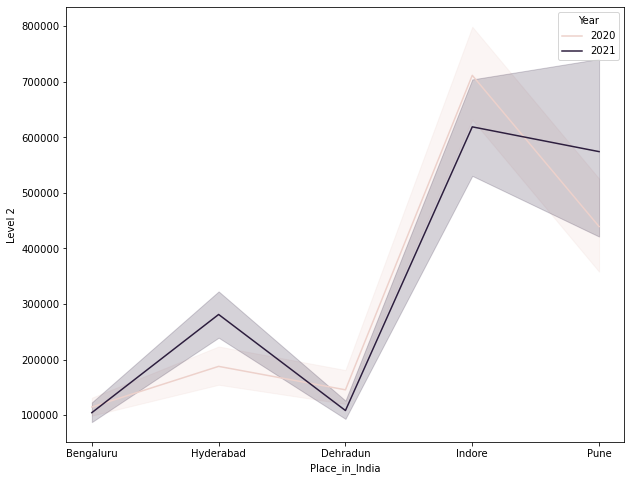

In [482]:
'''1.	A line graph for “Level 2” for the different “Place_in_India?” over the months of the year 2020 & 2021.'''

# Issue
plt.figure(figsize=(10,8))
sns.lineplot(x=data[data['Year'].isin([2020,2021])]['Place_in_India'],y=data[data['Year'].isin([2020,2021])]['Level 2'],hue=data[data['Year'].isin([2020,2021])]['Year'])

***Here is also a problem, that date feature is not given properly ,if i try to plot year by year in x axis,it will be just a straight line.Therefore i am plotting cities in X axis.***

<AxesSubplot:xlabel='Laptop/Desktop', ylabel='Level 1'>

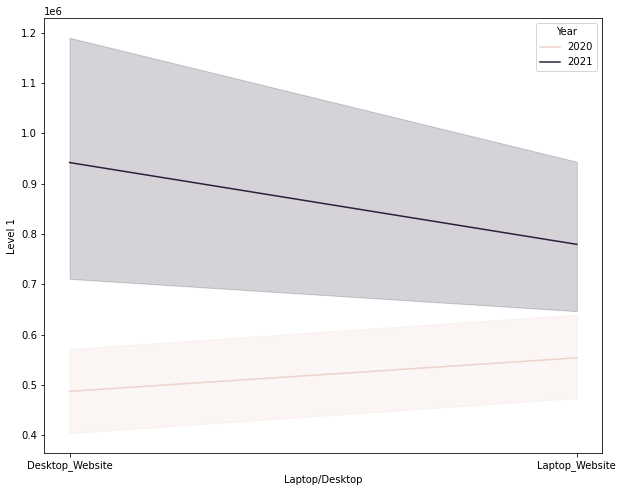

In [483]:
'''2.	A line graph for “Level 1” for the different “Laptop/Desktop” over the months of the year 2020 & 2021. '''
# here is also an issue ,but i will try to plot laptop/desktop in x axis
plt.figure(figsize=(10,8))
sns.lineplot(x=data[data['Year'].isin([2020,2021])]['Laptop/Desktop'],y=data[data['Year'].isin([2020,2021])]['Level 1'],hue=data[data['Year'].isin([2020,2021])]['Year'])

        Same issue(unavailability of date)

<AxesSubplot:xlabel='Coming from', ylabel='Level 2'>

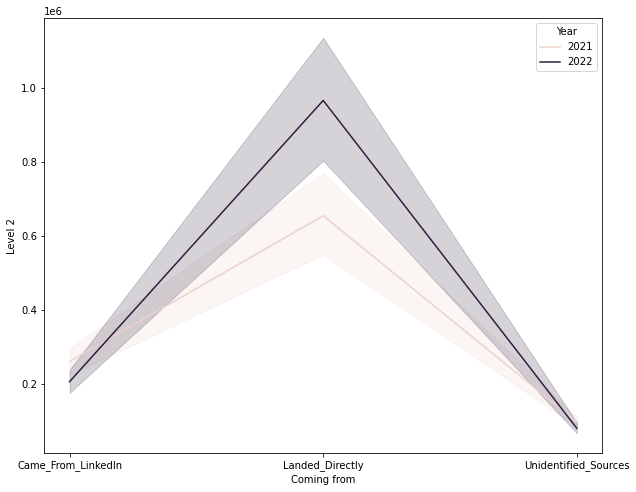

In [484]:
'''3.	A line graph for “Level 2” for the different “Coming from” over the months of the year 2021 & 2022'''
# here is also an issue ,but i will try to plot Coming from in x axis
plt.figure(figsize=(10,8))
sns.lineplot(x=data[data['Year'].isin([2021,2022])]['Coming from'],y=data[data['Year'].isin([2022,2021])]['Level 2'],hue=data[data['Year'].isin([2022,2021])]['Year'])

         Same issue(unavailability of date)

<AxesSubplot:xlabel='inc/dec percentage', ylabel='Level 1'>

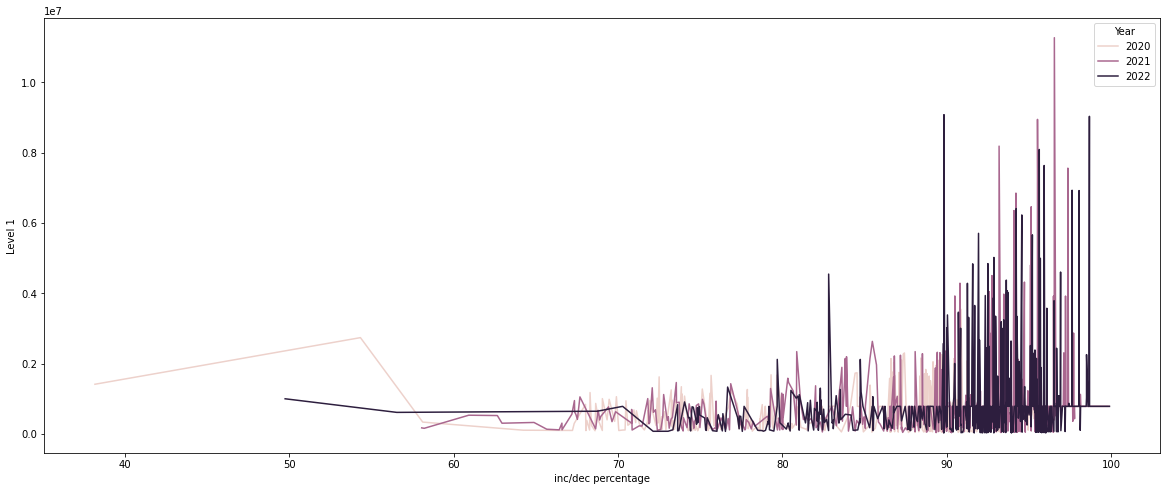

In [500]:
'''4.	A line graph for “Level 1”, “Level 4”  and “inc/dec percentage” columns over the months of the year 2020, 2021 & 2022.'''
# here is also an issue ,but i will try to plot Coming from in x axis
# for level 1
plt.figure(figsize=(20,8))
sns.lineplot(x=data[data['Year'].isin([2021,2022,2020])]['inc/dec percentage'],y=data[data['Year'].isin([2022,2021,2020])]['Level 1'],hue=data[data['Year'].isin([2022,2021,2020])]['Year'])

<AxesSubplot:xlabel='inc/dec percentage', ylabel='Level 2'>

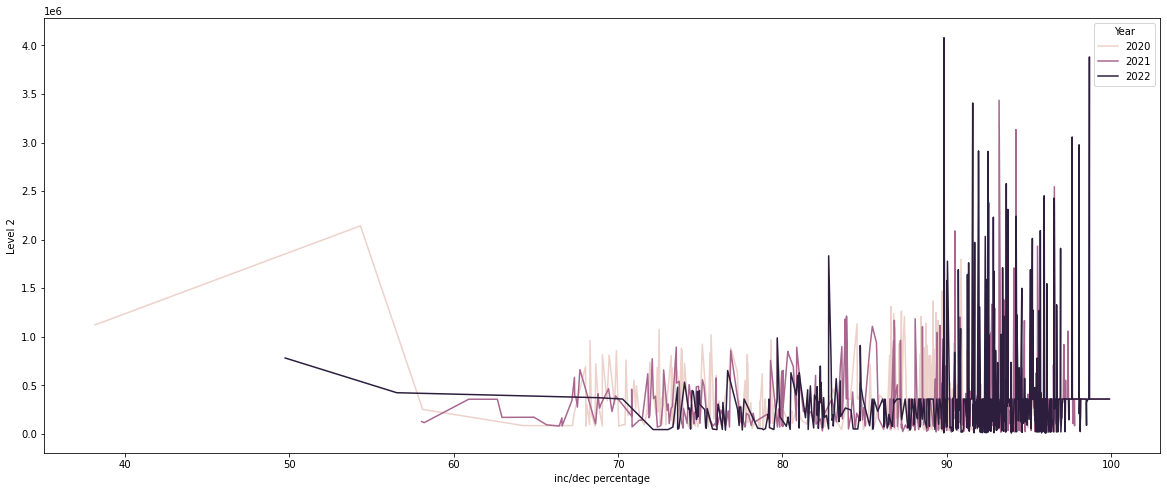

In [501]:
# level 2
plt.figure(figsize=(20,8))
sns.lineplot(x=data[data['Year'].isin([2021,2022,2020])]['inc/dec percentage'],y=data[data['Year'].isin([2022,2021,2020])]['Level 2'],hue=data[data['Year'].isin([2022,2021,2020])]['Year'])

<AxesSubplot:xlabel='inc/dec percentage', ylabel='Level 3'>

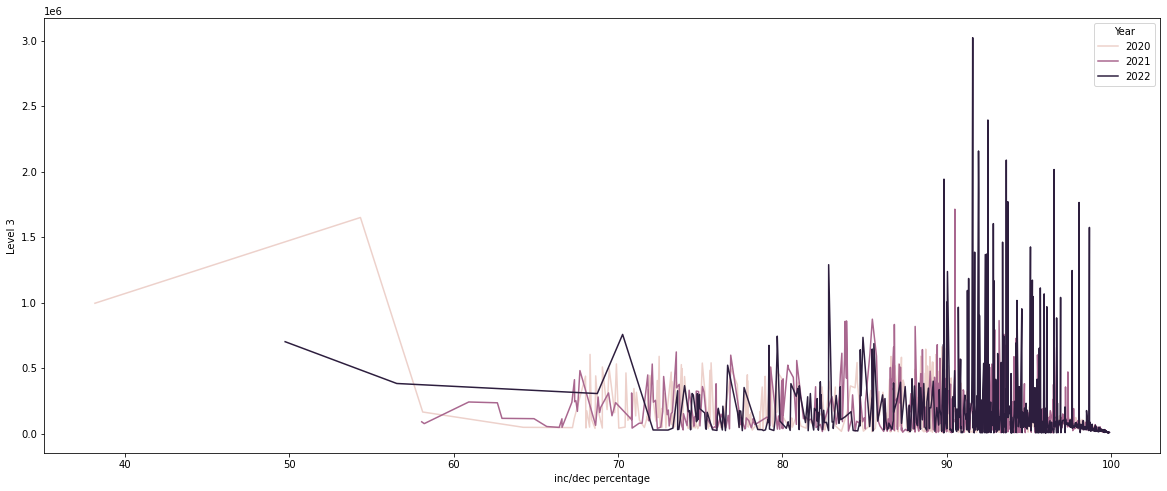

In [502]:
#level 3
plt.figure(figsize=(20,8))
sns.lineplot(x=data[data['Year'].isin([2021,2022,2020])]['inc/dec percentage'],y=data[data['Year'].isin([2022,2021,2020])]['Level 3'],hue=data[data['Year'].isin([2022,2021,2020])]['Year'])

<AxesSubplot:xlabel='Place_in_India', ylabel='Level 3'>

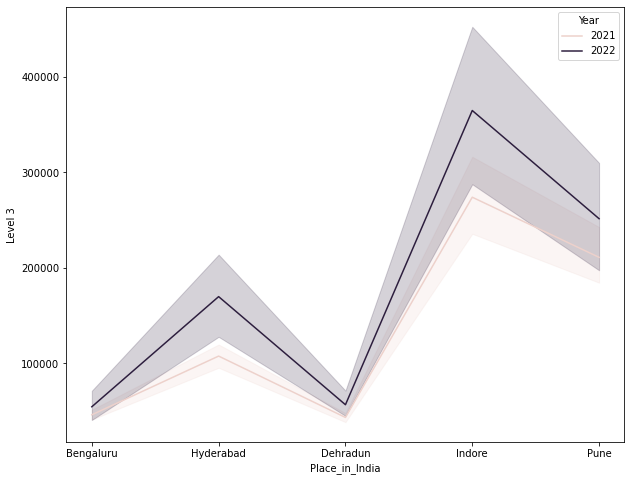

In [504]:
'''5.	A line graph for “Level 3” and “Place_in_India” over the months of the year 2020 and 2021.'''
# here is also an issue ,but i will try to plot Coming from in x axis
plt.figure(figsize=(10,8))
sns.lineplot(x=data[data['Year'].isin([2021,2022])]['Place_in_India'],y=data[data['Year'].isin([2022,2021])]['Level 3'],hue=data[data['Year'].isin([2022,2021])]['Year'])

<AxesSubplot:xlabel='Type_of_Customers?', ylabel='Level 1'>

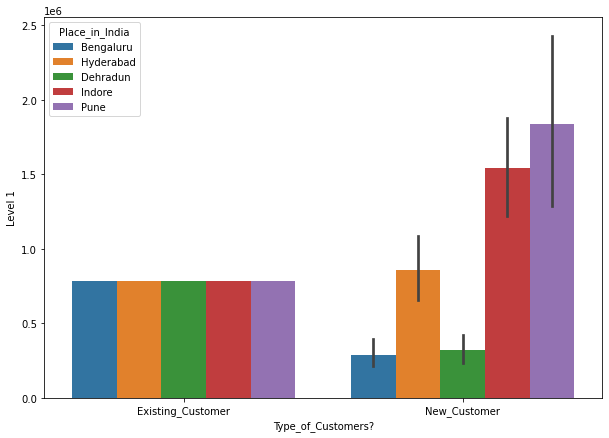

In [507]:
'''6.	A well visualized bar graph showing the “Level 1” from various places in India , 
also, representing the type of customers, for the year 2022'''
plt.figure(figsize=(10,7))
sns.barplot(data=data[data['Year']==2022],x='Type_of_Customers?',y='Level 1',hue='Place_in_India')

**7.	Please add any insights you could derive from all the graphs above.**

        1. (Plot 1)In both year 2020 and 2021, Level 2 traffic was highest from same place i.e Indore.
        2. (PLot 2) In year 2020 laptop_website has contributed more to Level 1 traffic as compare to desktop_site whereas in year 2021 desktop_website has contributed more as compare to laptop_website.
        3. (Plot 3) Mostly direct traffic is coming directly.
        4. (Plot 5) Level 3 traffic is coming mostly from Indore in both years i.e 2020 and 2021
        5. (Plot 6) Level 1 traffic coming from Existing_Customers are same from all the places but in case of New_Customer,Pune is contributing most to Level 1 traffic ,then Indore and least is Bengaluru.

# Part 6: About the Previous projects
● Please describe any interesting project you did in the Data Science domain in more than 250 words. Attach
Github links if possible

**Project Title :  ANDRIOD_AUTHENTICITY_PREDICTION**

**Problem Statement**: This dfset consists of apps needed permissions during installation and run-time. We collect apps from three different sources google play, third-party apps and malware dataset. This file contains more than 30,000 Android apps. features extracted at the time of installation and execution. One file contains the name of the features and others contain .apk file corresponding to it extracted permissions with respective package. Apps are collected from Google's play store, hiapk, app china, Android, mumayi , gfan slideme, and pandaapp. These .apk files collected from the last three years continuously and contain 81 distinct malware families. But, Here you are only supposed to predict whether the app is benign(0) or malware(1).

**Attribute Information :**

There are total 183 independent variables and 1 dependent feature which are as follows :

1 . App :- Name of the App

2 . Package :- OBB/Data package installed in root folder

3 . Category :- App Category (eg. Entertainment, Adventure, puzzle, Action, Antivirus, etc.)

4 . Description :- App Description

5 . Rating :- Rating out of 5

6 . Number of ratings :- No. of Ratings given by users

7 . Price :- Price of the App

8 . Related apps :- Apps related to installed App

9 . Dangerous (D) permissions count :- No. of Dangerous Permissions allowed by user

10 . Safe (S) permissions count :- No. of Safe Permissions allowed by user

11-183 .are different types of permission

184 . Class :- 0 : Benign , 1 : Malware   (***Class variable***)


**Primary Goal :** As this is a classification problem ,the primary goal of this project was to classify whether the app is malware or not.

**Problem Faced :**
1. The main issue i faced while doing this project was when i was going through data pre-processing stage,in the stage of outlier removal ,there were total around 800 outlier data point but when i did some EDA ,i came to know that out of 800 outlier ,more than 500 datapoints were related to class 1 which were the malware apps,if i would have removed those outliers ,there would have been an issue of data leakage,therefore i did not removed all the outliers totally.

2. After that ,as we know there are more than 150 independent variable ,so i performed feature extraction and feature selection to ged ridd off from the curse of high dimensionality.

**Solution :**
1. Performed EDA to get to know about data.
2. Went through Data wrangling and pre-processing stage.
3. Performed Feature Extarction and Feature Selection.
4. Performed feature scaling.
5. train test split
6. applied Ensembling technique called XGBoost
7. Improved f1-score from 74 to 85. 


**GitHub :**https://github.com/ajayn3300/Android-Authenticity-Prediction--Classification-.git


# Part 7 : Time management

● **Can you please share your thoughts, in less than 120 words, on “If you get selected, how will you manage
your time for this full-time internship opportunity”**

    I completed this assignment in just one day without sacrificing any other thing of my day because yesterday i just relocated to some other city . I bilieve that it is my time management that i am able to complete this assigment within given period of time and if i talk about managing time with full time internship ,i have just given you an example.     